# Subplots

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?

Signature: plt.subplot(*args, **kwargs)
Docstring:
Add a subplot to the current figure.

Wrapper of `.Figure.add_subplot` with a difference in behavior
explained in the notes section.

Call signatures::

   subplot(nrows, ncols, index, **kwargs)
   subplot(pos, **kwargs)
   subplot(**kwargs)
   subplot(ax)

Parameters
----------
*args : int, (int, int, *index*), or `.SubplotSpec`, default: (1, 1, 1)
    The position of the subplot described by one of

    - Three integers (*nrows*, *ncols*, *index*). The subplot will take the
      *index* position on a grid with *nrows* rows and *ncols* columns.
      *index* starts at 1 in the upper left corner and increases to the
      right. *index* can also be a two-tuple specifying the (*first*,
      *last*) indices (1-based, and including *last*) of the subplot, e.g.,
      ``fig.add_subplot(3, 1, (1, 2))`` makes a subplot that spans the
      upper 2/3 of the figure.
    - A 3-digit integer. The digits are interpreted as if given separately
 

In matplotlib, a conceptual grid is overlayed on the figure. And a subplot command allows us to create axis to different portions of this grid.  
For instance, if we wanted to create two plots side by side we would call subplot with parameters 1, 2 and 1 - to use 1 row with 2 columns and set the 1st axis to be the current axis.

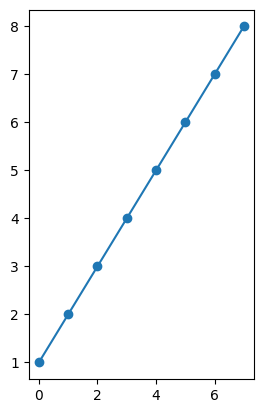

In [2]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')
# this call to plot will create the left hand side plot.

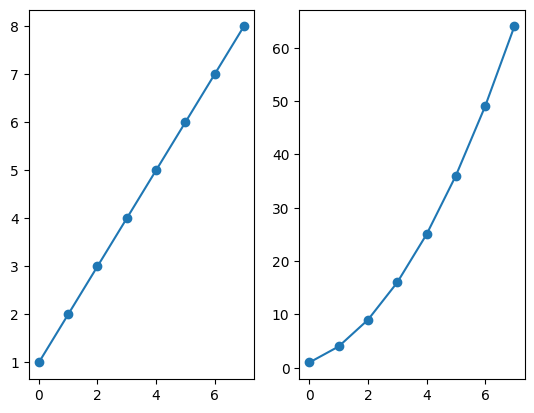

In [3]:
plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')

exponential_data = linear_data**2 
# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

Now we have two plots, each with their own axes objects.  
  
The norm with matplotlib is that you store the axes object that you get back from the subplot.  
But you can call subplot again at any time with the parameters that interest you in order to get back a given axes.  
Let's put exponential on the linear graph 2 

/tmp/ipykernel_20726/3864693702.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)


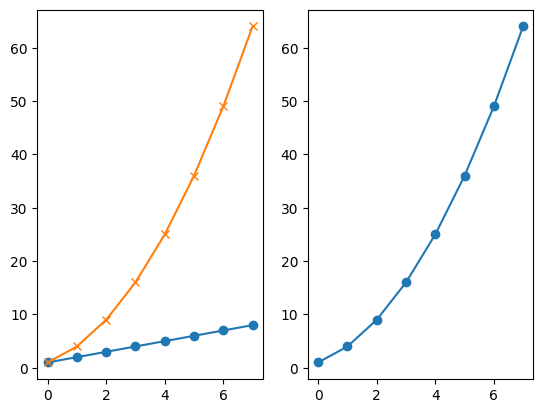

In [4]:
plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')

# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

When you're creating a new subplot you are able to share the x, y, or both axes using the `sharex` and `sharey` parameters

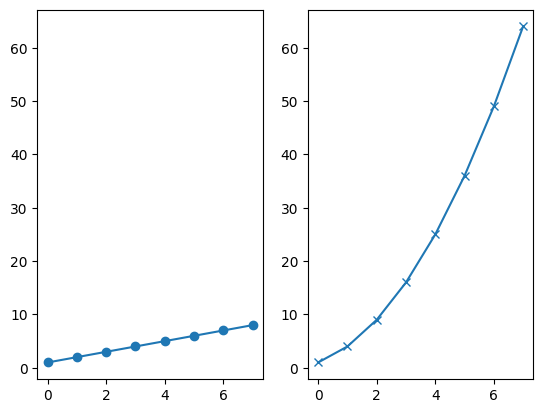

In [5]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)
plt.plot(exponential_data, '-x') 
# under the hood plt.plot uses gca() to get the last axis object that we're using

In [6]:
# plt.figure()
# # the right hand side is equivalent shorthand syntax
# plt.subplot(1,2,1) == plt.subplot(121)

There's a nice function called subplots, which allows you to get many axis objects at once.  
It's an effective way to build a grid where everything shares an axis (of course we could also just return the tuple of plots and iterate it over, if we wanted to).

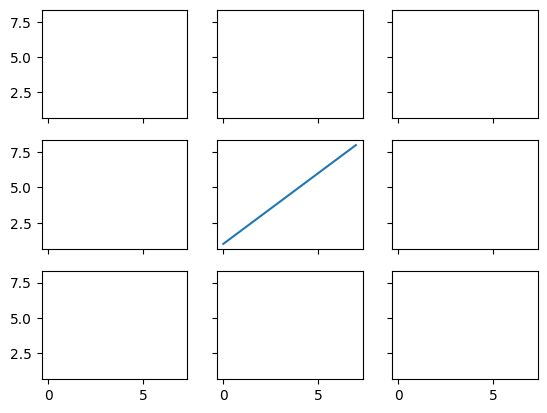

In [7]:
# create a 3x3 grid of subplots
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

Note that this method turns off the y and x labels except for those plots which are on the left hand side or the bottom of the figure.  
If you want to turn the labels back on, you need to and do it directly, iterating through the axis objects.

In [8]:
# fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
# ax5.plot(linear_data, '-')

# # set inside tick labels to visible
# for ax in plt.gcf().get_axes():
#     for label in ax.get_xticklabels() + ax.get_yticklabels():
#         label.set_visible(True)

# # necessary on some systems to update the plot
# plt.gcf().canvas.draw()